In [30]:
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt

out_dir = "../data" #output directory
# read data from all files
result = pd.concat(
    [pd.read_csv(file, encoding="utf-8", parse_dates=[1,2,5], dayfirst=True) for file in glob.glob(out_dir + "/*.csv")],
    ignore_index=True)

In [31]:
#     'ostapbender', 'nvaluev', 'karpovvyacheslav', 'naguchevroman'
##    'chaplygin', 'kozhevnikov', 'netsenko', 'zhukov', 'falcao1984', 'andronov', 'teplofevralya', 'nobel'

In [32]:
#group by time ranges
per = result.date.dt.to_period('M')
#dti =  pd.date_range(start=min(result.date), end=max(result.date), freq='2M')
df = result.groupby(by=['author', per, 'status']).agg({'factor':['sum', 'count']})
# tune up dataframe
df.columns = ["_".join(x) for x in df.columns.ravel()]
df.reset_index(inplace=True)
# make columns with detailed data on W-R-L
df = df.pivot_table(index=['author', 'date'], columns='status', values=['factor_sum', 'factor_count'])
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.fillna(value=0)
# add summary columns
#MIN_GAMES_THRES = 0 # too few games per period are not counted
#df['count'] = [s if s >= MIN_GAMES_THRES else float('nan') for s in df['factor_count_L'] + df['factor_count_R'] + df['factor_count_W']] 
df['count'] = df['factor_count_L'] + df['factor_count_R'] + df['factor_count_W']
df['return'] = df['factor_sum_W'] + df['factor_count_R']
df['win'] = df['factor_sum_W'] - df['factor_count_L'] - df['factor_count_W']
df['success_rate'] = df['win'] / df['count'] * 100
df.reset_index(inplace=True)
#df

In [42]:
#filter one author
df_tmp = df[df.author.isin(['netsenko', 'zhukov', 'falcao1984'])][['author','date', 'count', 'success_rate']]

count                      success_rate                       
author falcao1984  netsenko     zhukov   falcao1984    netsenko     zhukov
count   19.000000   5.00000  21.000000    19.000000    5.000000  21.000000
mean    22.894737  24.40000  31.571429     9.521135  -15.154346   6.433727
std      7.887365  16.42559  14.309338    22.057760   49.192409  18.836361
min     10.000000   3.00000   2.000000   -63.161290 -100.000000 -35.062500
25%     17.500000  13.00000  16.000000     4.910839  -12.307692  -2.450000
50%     22.000000  26.00000  40.000000    11.333333    3.076923   6.341463
75%     25.500000  39.00000  41.000000    21.166667    9.410256  22.175000
max     44.000000  41.00000  51.000000    41.062500   24.048780  38.371429

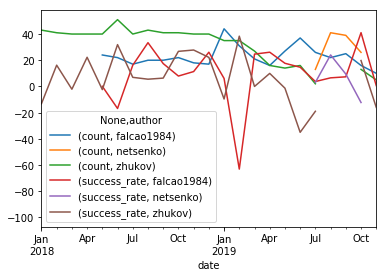

In [47]:
df_plot = df_tmp.pivot_table(index=['date'], columns='author', values=['count', 'success_rate'])
df_plot.plot()
df_plot.describe()

In [45]:
df_plot_19 = df_plot[df_plot.date >= datetime.date(2019, 1, 1)]
df_plot_19.plot()
df_plot_19.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

In [46]:
df_plot

count                
author  falcao1984 netsenko zhukov
date                              
2018-01        NaN      NaN   43.0
2018-02        NaN      NaN   41.0
2018-03        NaN      NaN   40.0
2018-04        NaN      NaN   40.0
2018-05       24.0      NaN   40.0
2018-06       22.0      NaN   51.0
2018-07       17.0      NaN   40.0
2018-08       20.0      NaN   43.0
2018-09       20.0      NaN   41.0
2018-10       22.0      NaN   41.0
2018-11       18.0      NaN   40.0
2018-12       17.0      NaN   40.0
2019-01       44.0      NaN   35.0
2019-02       31.0      NaN   35.0
2019-03       21.0      NaN   27.0
2019-04       16.0      NaN   16.0
2019-05       27.0      3.0   14.0
2019-06       37.0      NaN   16.0
2019-07       26.0     13.0    2.0
2019-08       22.0     41.0    NaN
2019-09       25.0     39.0    NaN
2019-10       16.0     26.0   13.0
2019-11       10.0      NaN    5.0